Import the Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

Load the data

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape,x_test.shape, y_test.shape

170498071/170498071 [==============================] - 16s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [9]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

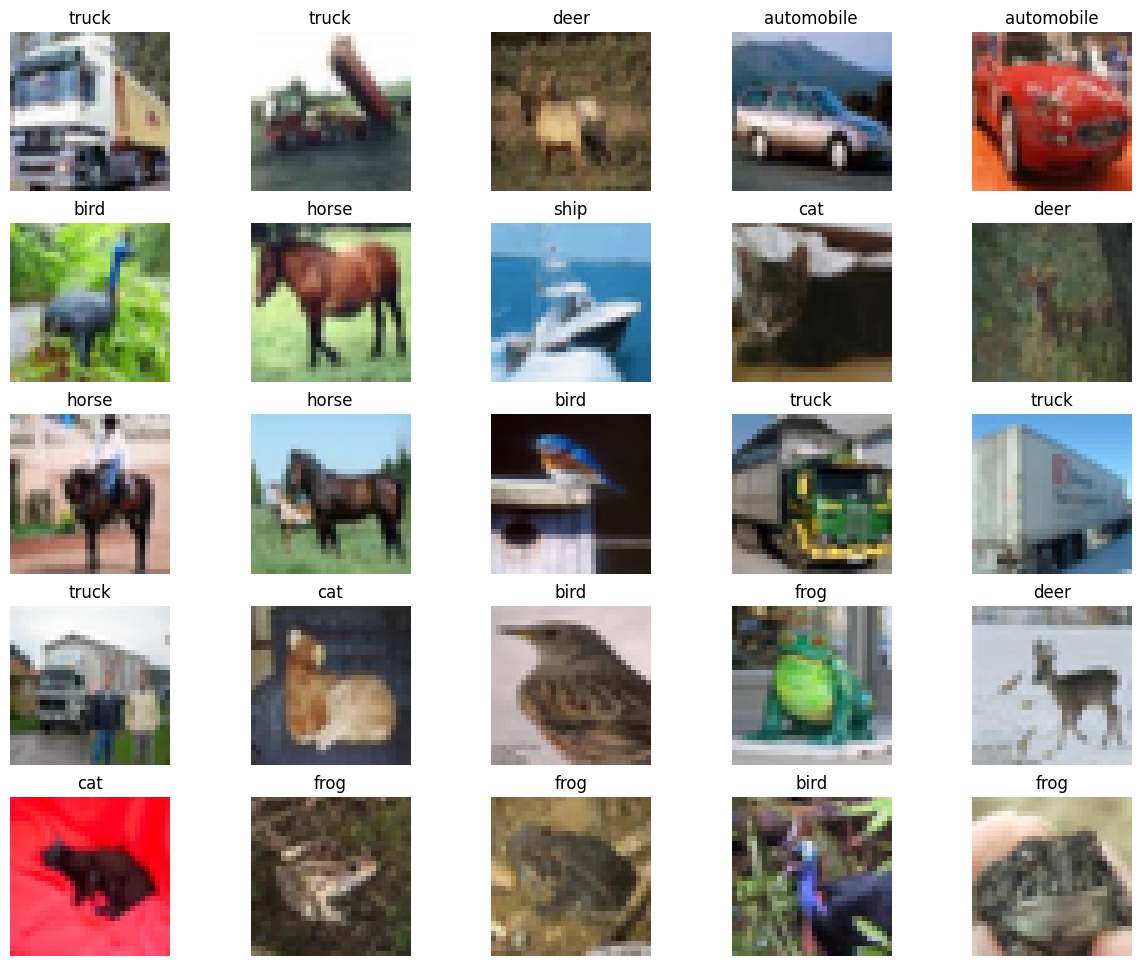

In [8]:
plt.figure(figsize=(15,12))
count=0
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(labels[y_train[i][0]])

Normalize

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Build the Model

In [14]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=(3,3),
                 activation='relu'))

# First Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

# Second Convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu'))

# Second Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)              

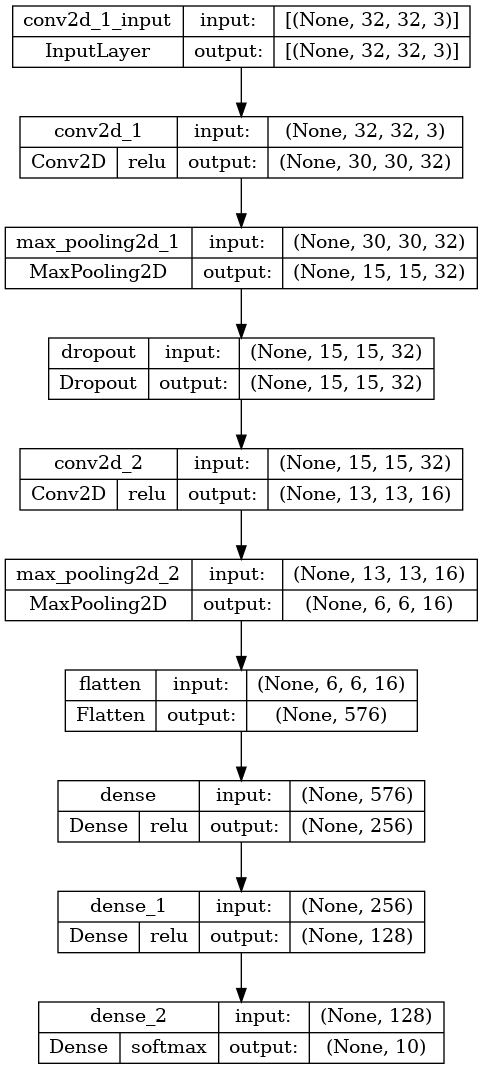

In [16]:
plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes=True)

Compile the model

In [17]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train the model

In [18]:
model.fit(x_train,y_train, epochs = 10, batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 45s 9ms/step - loss: 2.0076 - accuracy: 0.2819
Epoch 2/10
5000/5000 [==============================] - 44s 9ms/step - loss: 1.5649 - accuracy: 0.4393
Epoch 3/10
5000/5000 [==============================] - 46s 9ms/step - loss: 1.4209 - accuracy: 0.4919
Epoch 4/10
5000/5000 [==============================] - 46s 9ms/step - loss: 1.3270 - accuracy: 0.5366
Epoch 5/10
5000/5000 [==============================] - 46s 9ms/step - loss: 1.2425 - accuracy: 0.5665
Epoch 6/10
5000/5000 [==============================] - 46s 9ms/step - loss: 1.1798 - accuracy: 0.5916
Epoch 7/10
5000/5000 [==============================] - 45s 9ms/step - loss: 1.1278 - accuracy: 0.6110
Epoch 8/10
5000/5000 [==============================] - 44s 9ms/step - loss: 1.0984 - accuracy: 0.6241
Epoch 9/10
5000/5000 [==============================] - 45s 9ms/step - loss: 1.0401 - accuracy: 0.6439
Epoch 10/10
5000/5000 [==============================] - 46s 9ms/step - l

Evaluate on Test Data

In [19]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 40s 4ms/step - loss: 1.2206 - accuracy: 0.5948


[1.2205567359924316, 0.5947999954223633]

Predict new Image

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [21]:
new = x_test[2345]

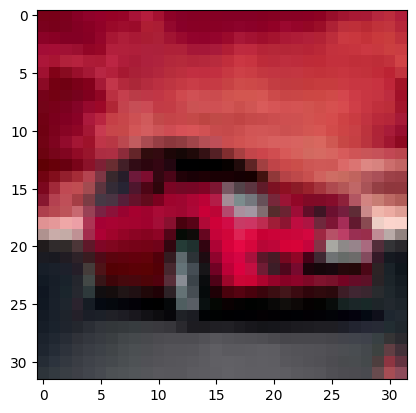

In [22]:
plt.imshow(new, cmap='gray')

In [27]:
new = new / 255
new= new.reshape(1,32,32,3)
result = model.predict(new)
labels[np.argmax(result)]

1/1 [==============================] - 0s 24ms/step


'deer'

Predict on Downloaded Image

In [28]:
import cv2
img = cv2.imread('/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/Day 16/horse.jpg')
img.shape

(753, 1000, 3)

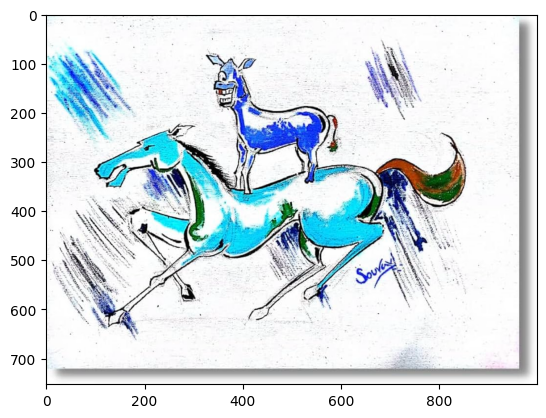

In [29]:
plt.imshow(img, cmap='gray')

In [31]:
# ss_cv = cv2.resize(img, (1,32,32,3))
ss_cv = img / 255
ss_cv= ss_cv.reshape(1,32,32,3)
result = model.predict(ss_cv)
labels[np.argmax(re

ValueError: cannot reshape array of size 2259000 into shape (1,32,32,3)